In [1]:
import pandas as pd 

import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Crude oil.csv')
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
0,2/3/2011,103.93,NaN,NaN,NaN,NaN,NaN,101.69
1,2/4/2011,104.10,NaN,NaN,NaN,NaN,NaN,99.43
2,2/7/2011,104.66,NaN,NaN,0.92,0.64,0.01,99.44
3,2/8/2011,105.06,NaN,NaN,NaN,NaN,NaN,99.25
4,2/9/2011,104.82,NaN,NaN,NaN,NaN,NaN,100.16
...,...,...,...,...,...,...,...,...
2192,12/24/2019,249.38,NaN,NaN,NaN,NaN,NaN,69.26
2193,12/26/2019,251.86,NaN,NaN,NaN,NaN,NaN,69.26
2194,12/27/2019,253.88,NaN,NaN,NaN,NaN,NaN,68.91
2195,12/30/2019,253.19,NaN,0.79,0.37,0.49,0.02,68.30


In [3]:
df = pd.read_csv('Crude oil.csv')

cols_to_interpolate = ['D3','D4','D5','D6']

for col in cols_to_interpolate:
    df[col] = df[col].interpolate(method='polynomial', order=2, limit_direction = 'both').bfill().ffill()

# Only forward fill
df['food inflation index (cpi)'] = df['food inflation index (cpi)'].interpolate(method='polynomial', 
                                                                                order=2, limit_direction = 'forward').ffill()

# DF
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
0,2/3/2011,103.93,NaN,1.200000,0.920000,0.640000,0.010000,101.69
1,2/4/2011,104.10,NaN,1.200000,0.920000,0.640000,0.010000,99.43
2,2/7/2011,104.66,NaN,1.200000,0.920000,0.640000,0.010000,99.44
3,2/8/2011,105.06,NaN,1.200000,0.896773,0.634694,0.009998,99.25
4,2/9/2011,104.82,NaN,1.200000,0.886159,0.625040,0.009997,100.16
...,...,...,...,...,...,...,...,...
2192,12/24/2019,249.38,99.68,0.965763,0.415734,0.476455,0.071251,69.26
2193,12/26/2019,251.86,99.68,0.929350,0.400979,0.481941,0.058335,69.26
2194,12/27/2019,253.88,99.68,0.870763,0.385734,0.486455,0.041251,68.91
2195,12/30/2019,253.19,99.68,0.790000,0.370000,0.490000,0.020000,68.30


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

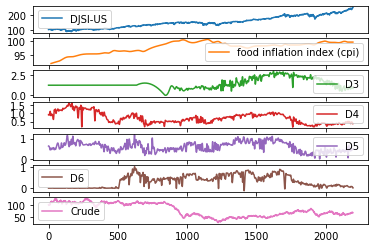

In [4]:
df.plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

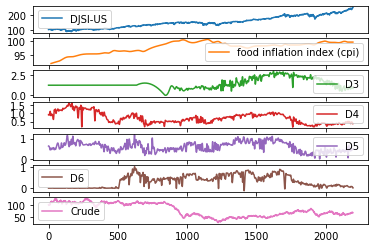

In [5]:
df.plot(subplots=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
0,2011-02-03,103.93,NaN,1.200000,0.920000,0.640000,0.010000,101.69
1,2011-02-04,104.10,NaN,1.200000,0.920000,0.640000,0.010000,99.43
2,2011-02-07,104.66,NaN,1.200000,0.920000,0.640000,0.010000,99.44
3,2011-02-08,105.06,NaN,1.200000,0.896773,0.634694,0.009998,99.25
4,2011-02-09,104.82,NaN,1.200000,0.886159,0.625040,0.009997,100.16
...,...,...,...,...,...,...,...,...
2192,2019-12-24,249.38,99.68,0.965763,0.415734,0.476455,0.071251,69.26
2193,2019-12-26,251.86,99.68,0.929350,0.400979,0.481941,0.058335,69.26
2194,2019-12-27,253.88,99.68,0.870763,0.385734,0.486455,0.041251,68.91
2195,2019-12-30,253.19,99.68,0.790000,0.370000,0.490000,0.020000,68.30


In [7]:
TARGET = 'D3'
y = df[TARGET]
y

0       1.200000
1       1.200000
2       1.200000
3       1.200000
4       1.200000
          ...   
2192    0.965763
2193    0.929350
2194    0.870763
2195    0.790000
2196    0.790000
Name: D3, Length: 2197, dtype: float64

In [8]:
# Load the data and split it into separate pieces
train_len = int(df.shape[0] * 0.9)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data[TARGET].values
y_test = test_data[TARGET].values

print(f"{train_len} train samples")
print(f"{df.shape[0] - train_len} test samples")

1977 train samples
220 test samples


In [9]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


In [10]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11009.218, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5532.185, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8278.475, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7799.007, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5534.127, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10265.118, Time=1.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11003.064, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11002.949, Time=2.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11127.463, Time=1.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-10559.026, Time=1.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11105.820, Time=2.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-11141.858, Time=2.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-10892.575, Time=2.28 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-11218.942, Time=2.88 sec
 ARIMA(4,

In [11]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 0.00023190867727367073
SMAPE: 1.1282704698438664


In [12]:
preds = pd.DataFrame(forecasts, index = test_data.index)
actuals = pd.DataFrame(y_test, index = test_data.index)
res = pd.concat([actuals, preds], axis = 1)
res.columns = ['Actuals', 'Predicted']
res['Delta'] = ((res['Actuals'] - res['Predicted'])/res['Predicted']) * 100
res

,Actuals,Predicted,Delta
1977,1.824017,1.828399,-0.239710
1978,1.811925,1.817320,-0.296861
1979,1.802565,1.805501,-0.162624
1980,1.788977,1.798418,-0.524960
1981,1.770000,1.776449,-0.363012
...,...,...,...
2192,0.965763,0.966228,-0.048156
2193,0.929350,0.931933,-0.277141
2194,0.870763,0.884248,-1.525093
2195,0.790000,0.808025,-2.230802


In [13]:
auto2 = pm.auto_arima(y, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12220.065, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6082.340, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9180.687, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8614.386, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6084.319, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11406.714, Time=1.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12210.648, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-12211.666, Time=2.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-12331.098, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11704.599, Time=1.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-12301.387, Time=2.54 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-12338.984, Time=2.60 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-12030.773, Time=2.30 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-12429.094, Time=3.10 sec
 ARIMA(4,

In [14]:
forecasts = auto2.predict(n_periods=15)

In [15]:
forecast_indexes = pd.date_range(start=df.index[-1], periods=16)
forecast_indexes = forecast_indexes[1:]
forecast_indexes

DatetimeIndex(['1970-01-02 00:00:00.000002196',
               '1970-01-03 00:00:00.000002196',
               '1970-01-04 00:00:00.000002196',
               '1970-01-05 00:00:00.000002196',
               '1970-01-06 00:00:00.000002196',
               '1970-01-07 00:00:00.000002196',
               '1970-01-08 00:00:00.000002196',
               '1970-01-09 00:00:00.000002196',
               '1970-01-10 00:00:00.000002196',
               '1970-01-11 00:00:00.000002196',
               '1970-01-12 00:00:00.000002196',
               '1970-01-13 00:00:00.000002196',
               '1970-01-14 00:00:00.000002196',
               '1970-01-15 00:00:00.000002196',
               '1970-01-16 00:00:00.000002196'],
              dtype='datetime64[ns]', freq='D')

In [16]:
future_forecasts = pd.DataFrame(forecasts, index = forecast_indexes)
future_forecasts

,0
1970-01-02 00:00:00.000002196,0.865497
1970-01-03 00:00:00.000002196,0.983636
1970-01-04 00:00:00.000002196,1.126387
1970-01-05 00:00:00.000002196,1.238854
1970-01-06 00:00:00.000002196,1.277963
1970-01-07 00:00:00.000002196,1.254867
1970-01-08 00:00:00.000002196,1.185670
1970-01-09 00:00:00.000002196,1.097581
1970-01-10 00:00:00.000002196,1.012591
1970-01-11 00:00:00.000002196,0.947417


In [17]:
new_preds = pd.concat([preds, future_forecasts])
new_preds.columns = ['Actuals']

final_results = pd.concat([actuals, new_preds], axis = 1)
final_results.columns = ['Actuals', 'Predicted']
final_results['Delta'] = ((final_results['Actuals'] - final_results['Predicted'])/final_results['Predicted']) * 100
final_results.tail(50)

C:\opt\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2955: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects
  return left.union(right, sort=sort)


,Actuals,Predicted,Delta
2162,0.680000,0.676287,0.549035
2163,0.726866,0.719706,0.994856
2164,0.798227,0.787706,1.335664
2165,0.875474,0.872156,0.380416
2166,0.940000,0.936931,0.327575
2167,0.991806,0.980238,1.180099
2168,1.030890,1.019490,1.118279
2169,1.055982,1.050271,0.543771
2170,1.059442,1.064890,-0.511534
2171,1.040000,1.040989,-0.095047


In [18]:
df.to_csv('final_results.csv', index = False, header=True)